**Atualizando a biblioteca para plotagem de gráficos**


In [1]:
%pip -q install plotly --upgrade
%pip -q install yellowbrick pandas seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


**Importando bibliotecas**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.tree import DecisionTreeClassifier

**Abrindo um arquivo CSV do drive**

In [3]:
base = pd.read_csv('../Dados/restaurante.csv', sep=';')

**Você também pode carregar seu arquivo e já selecionar as colunas que desejar... investigue esta função**

In [4]:
#base2 = pd.read_csv('/content/sample_data/restaurante.csv', ';', usecols=['Alternativo', 'Bar'])
#base2

In [5]:
base

,Alternativo,Bar,Sex/Sab,Fome,Cliente,Preco,Chuva,Reserva,Tipo,Tempo,Conclusao
0,Sim,Nao,Nao,Sim,Alguns,RRR,Nao,Sim,Frances,0-10,Sim
1,Sim,Nao,Nao,Sim,Cheio,R,Nao,Nao,Tailandes,30-60,Nao
2,Nao,Sim,Nao,Nao,Alguns,R,Nao,Nao,Hamburger,0-10,Sim
3,Sim,Nao,Sim,Sim,Cheio,R,Sim,Nao,Tailandes,10-30,Sim
4,Sim,Nao,Sim,Nao,Cheio,RRR,Nao,Sim,Frances,>60,Nao
5,Nao,Sim,Nao,Sim,Alguns,RR,Sim,Sim,Italiano,0-10,Sim
6,Nao,Sim,Nao,Nao,Nenhum,R,Sim,Nao,Hamburger,0-10,Nao
7,Nao,Nao,Nao,Sim,Alguns,RR,Sim,Sim,Tailandes,0-10,Sim
8,Nao,Sim,Sim,Nao,Cheio,R,Sim,Nao,Hamburger,>60,Nao
9,Sim,Sim,Sim,Sim,Cheio,RRR,Nao,Sim,Italiano,10-30,Nao


In [6]:
base.head(3)

,Alternativo,Bar,Sex/Sab,Fome,Cliente,Preco,Chuva,Reserva,Tipo,Tempo,Conclusao
0,Sim,Nao,Nao,Sim,Alguns,RRR,Nao,Sim,Frances,0-10,Sim
1,Sim,Nao,Nao,Sim,Cheio,R,Nao,Nao,Tailandes,30-60,Nao
2,Nao,Sim,Nao,Nao,Alguns,R,Nao,Nao,Hamburger,0-10,Sim


In [7]:
base.tail(2)

,Alternativo,Bar,Sex/Sab,Fome,Cliente,Preco,Chuva,Reserva,Tipo,Tempo,Conclusao
10,Nao,Nao,Nao,Nao,Nenhum,R,Nao,Nao,Tailandes,0-10,Nao
11,Sim,Sim,Sim,Sim,Cheio,R,Nao,Nao,Hamburger,30-60,Sim


**Contando quantidade de instâncias**


In [8]:
np.unique(base['Conclusao'], return_counts=True)

(array(['Nao', 'Sim'], dtype=object), array([6, 6]))

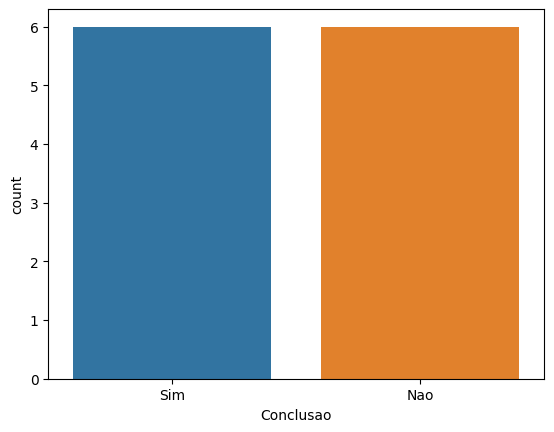

In [9]:
sns.countplot(x = base['Conclusao']);

**Separando os atributos de entrada e de classe**

In [10]:
X_prev = base.iloc[:, 0:10].values

In [11]:
X_prev

array([['Sim', 'Nao', 'Nao', 'Sim', 'Alguns', 'RRR', 'Nao', 'Sim',
        'Frances', '0-10'],
       ['Sim', 'Nao', 'Nao', 'Sim', 'Cheio', 'R', 'Nao', 'Nao',
        'Tailandes', '30-60'],
       ['Nao', 'Sim', 'Nao', 'Nao', 'Alguns', 'R', 'Nao', 'Nao',
        'Hamburger', '0-10'],
       ['Sim', 'Nao', 'Sim', 'Sim', 'Cheio', 'R', 'Sim', 'Nao',
        'Tailandes', '10-30'],
       ['Sim', 'Nao', 'Sim', 'Nao', 'Cheio', 'RRR', 'Nao', 'Sim',
        'Frances', '>60'],
       ['Nao', 'Sim', 'Nao', 'Sim', 'Alguns', 'RR', 'Sim', 'Sim',
        'Italiano', '0-10'],
       ['Nao', 'Sim', 'Nao', 'Nao', 'Nenhum', 'R', 'Sim', 'Nao',
        'Hamburger', '0-10'],
       ['Nao', 'Nao', 'Nao', 'Sim', 'Alguns', 'RR', 'Sim', 'Sim',
        'Tailandes', '0-10'],
       ['Nao', 'Sim', 'Sim', 'Nao', 'Cheio', 'R', 'Sim', 'Nao',
        'Hamburger', '>60'],
       ['Sim', 'Sim', 'Sim', 'Sim', 'Cheio', 'RRR', 'Nao', 'Sim',
        'Italiano', '10-30'],
       ['Nao', 'Nao', 'Nao', 'Nao', 'Nenhum', 'R', '

In [12]:
X_prev_label = base.iloc[:, 0:10]

In [13]:
X_prev_label

,Alternativo,Bar,Sex/Sab,Fome,Cliente,Preco,Chuva,Reserva,Tipo,Tempo
0,Sim,Nao,Nao,Sim,Alguns,RRR,Nao,Sim,Frances,0-10
1,Sim,Nao,Nao,Sim,Cheio,R,Nao,Nao,Tailandes,30-60
2,Nao,Sim,Nao,Nao,Alguns,R,Nao,Nao,Hamburger,0-10
3,Sim,Nao,Sim,Sim,Cheio,R,Sim,Nao,Tailandes,10-30
4,Sim,Nao,Sim,Nao,Cheio,RRR,Nao,Sim,Frances,>60
5,Nao,Sim,Nao,Sim,Alguns,RR,Sim,Sim,Italiano,0-10
6,Nao,Sim,Nao,Nao,Nenhum,R,Sim,Nao,Hamburger,0-10
7,Nao,Nao,Nao,Sim,Alguns,RR,Sim,Sim,Tailandes,0-10
8,Nao,Sim,Sim,Nao,Cheio,R,Sim,Nao,Hamburger,>60
9,Sim,Sim,Sim,Sim,Cheio,RRR,Nao,Sim,Italiano,10-30


In [14]:
X_prev[:,5]

array(['RRR', 'R', 'R', 'R', 'RRR', 'RR', 'R', 'RR', 'R', 'RRR', 'R', 'R'],
      dtype=object)

In [15]:
y_classe = base.iloc[:, 10].values

In [16]:
y_classe

array(['Sim', 'Nao', 'Sim', 'Sim', 'Nao', 'Sim', 'Nao', 'Sim', 'Nao',
       'Nao', 'Nao', 'Sim'], dtype=object)

**Podemos fazer esta mesma divisão (separar as variáveis de entrada e saída) usando os comandos abaixo**

In [17]:
#X = base.copy()
#y = X.pop('Conclusao')

**Tratamento de dados categóricos**

> *LabelEncoder - Vamos tratar os dados categóricos colocando 1, 2, 3 e etc**



In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
label_encoder = LabelEncoder()

In [20]:
X_prev[:,0]

array(['Sim', 'Sim', 'Nao', 'Sim', 'Sim', 'Nao', 'Nao', 'Nao', 'Nao',
       'Sim', 'Nao', 'Sim'], dtype=object)

In [21]:
label_encoder_Alternativo = LabelEncoder()
label_encoder_Bar = LabelEncoder()
label_encoder_SexSab = LabelEncoder()
label_encoder_Fome = LabelEncoder()
label_encoder_Chuva = LabelEncoder()
label_encoder_Reserva = LabelEncoder()

X_prev[:,0] = label_encoder_Alternativo.fit_transform(X_prev[:,0])
X_prev[:,1] = label_encoder_Bar.fit_transform(X_prev[:,1])
X_prev[:,2] = label_encoder_SexSab.fit_transform(X_prev[:,2])
X_prev[:,3] = label_encoder_Fome.fit_transform(X_prev[:,3])
X_prev[:,6] = label_encoder_Chuva.fit_transform(X_prev[:,6])
X_prev[:,7] = label_encoder_Reserva.fit_transform(X_prev[:,7])

In [22]:
X_prev

array([[1, 0, 0, 1, 'Alguns', 'RRR', 0, 1, 'Frances', '0-10'],
       [1, 0, 0, 1, 'Cheio', 'R', 0, 0, 'Tailandes', '30-60'],
       [0, 1, 0, 0, 'Alguns', 'R', 0, 0, 'Hamburger', '0-10'],
       [1, 0, 1, 1, 'Cheio', 'R', 1, 0, 'Tailandes', '10-30'],
       [1, 0, 1, 0, 'Cheio', 'RRR', 0, 1, 'Frances', '>60'],
       [0, 1, 0, 1, 'Alguns', 'RR', 1, 1, 'Italiano', '0-10'],
       [0, 1, 0, 0, 'Nenhum', 'R', 1, 0, 'Hamburger', '0-10'],
       [0, 0, 0, 1, 'Alguns', 'RR', 1, 1, 'Tailandes', '0-10'],
       [0, 1, 1, 0, 'Cheio', 'R', 1, 0, 'Hamburger', '>60'],
       [1, 1, 1, 1, 'Cheio', 'RRR', 0, 1, 'Italiano', '10-30'],
       [0, 0, 0, 0, 'Nenhum', 'R', 0, 0, 'Tailandes', '0-10'],
       [1, 1, 1, 1, 'Cheio', 'R', 0, 0, 'Hamburger', '30-60']],
      dtype=object)



> OneHotEncoder - Agora vamos binarizar atributos não ordinais

**Contando quantas opções de resposta tem cada atributo**

In [23]:
len(np.unique(base['Cliente']))

3

In [24]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [25]:
onehotencoder_cliente = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [4])], remainder='passthrough')
onehotencoder_preco = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [7])], remainder='passthrough')
onehotencoder_tipo = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [12])], remainder='passthrough')
onehotencoder_tempo = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [16])], remainder='passthrough')
X_prev = onehotencoder_cliente.fit_transform(X_prev)
X_prev = onehotencoder_preco.fit_transform(X_prev)
X_prev = onehotencoder_tipo.fit_transform(X_prev)
X_prev = onehotencoder_tempo.fit_transform(X_prev)

In [26]:
X_prev

array([[1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0,
        0.0, 1, 0, 0, 1, 0, 1],
       [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0,
        0.0, 1, 0, 0, 1, 0, 0],
       [1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0,
        0.0, 0, 1, 0, 0, 0, 0],
       [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0,
        0.0, 1, 0, 1, 1, 1, 0],
       [0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0,
        0.0, 1, 0, 1, 0, 0, 1],
       [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0,
        0.0, 0, 1, 0, 1, 1, 1],
       [1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0,
        1.0, 0, 1, 0, 0, 1, 0],
       [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0,
        0.0, 0, 0, 0, 1, 1, 1],
       [0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0,
        0.0, 0, 1, 1, 0, 1, 0],
       [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.

In [27]:
X_prev.shape

(12, 20)

**Esta mesma transformação OneHotEncoder pode ser feita com o comando abaixo**

In [28]:
#base = pd.get_dummies(X_prev_label)
#base.head()

**Método de amostragem Holdout**

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
y_classe

array(['Sim', 'Nao', 'Sim', 'Sim', 'Nao', 'Sim', 'Nao', 'Sim', 'Nao',
       'Nao', 'Nao', 'Sim'], dtype=object)

In [31]:
y_classe.shape

(12,)

In [32]:
#X_train_ds, X_test_ds, y_train_ds, y_test_ds = train_test_split(X, y, test_size=0.3, random_state=123, shuffle=True, stratify=y)
X_treino, X_teste, y_treino, y_teste = train_test_split(X_prev, y_classe, test_size = 0.20, random_state = 23)

In [33]:
X_treino.shape

(9, 20)

In [34]:
X_teste.shape

(3, 20)

**Vamos experimentar agora o algoritmo Decision Tree?**

In [35]:
modelo = DecisionTreeClassifier(criterion='entropy')
Y = modelo.fit(X_treino, y_treino)

**Vamos testar o modelo?**

In [36]:
previsoes = modelo.predict(X_teste)

**Será se o modelo acertou?**

In [37]:
y_teste

array(['Sim', 'Nao', 'Sim'], dtype=object)

In [38]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_teste,previsoes)

0.3333333333333333

In [39]:
from yellowbrick.classifier import ConfusionMatrix
confusion_matrix(y_teste, previsoes)

array([[0, 1],
       [1, 1]])

0.3333333333333333

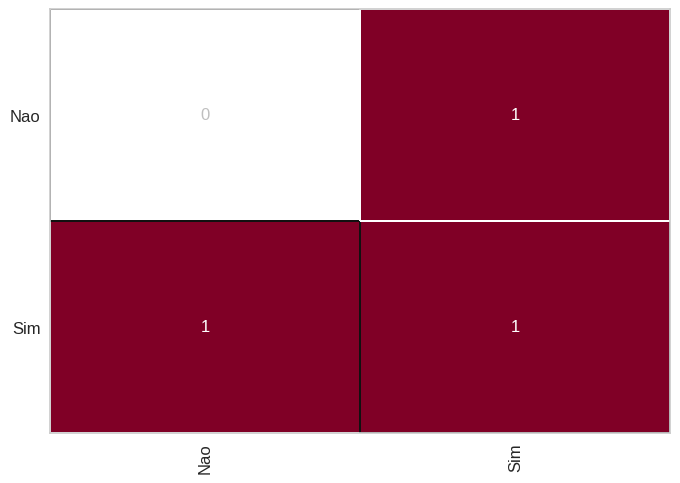

In [40]:
cm = ConfusionMatrix(modelo)
cm.fit(X_treino, y_treino)
cm.score(X_teste, y_teste)

In [41]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

         Nao       0.00      0.00      0.00         1
         Sim       0.50      0.50      0.50         2

    accuracy                           0.33         3
   macro avg       0.25      0.25      0.25         3
weighted avg       0.33      0.33      0.33         3



**Vamos ver a árvore?**

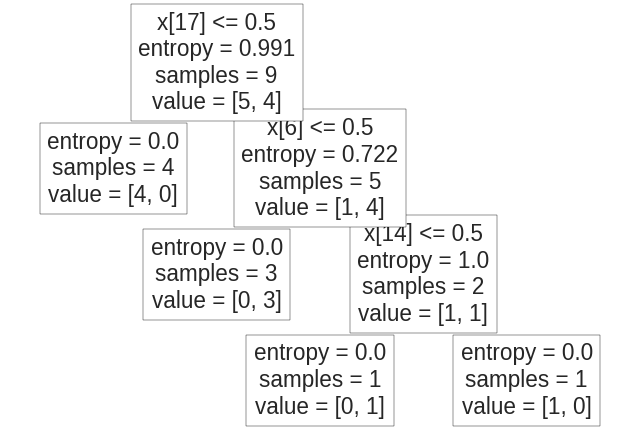

In [42]:
from sklearn import tree
plt.show(tree.plot_tree(Y))

**O que você achou? podemos fazê-la melhor! :-)**

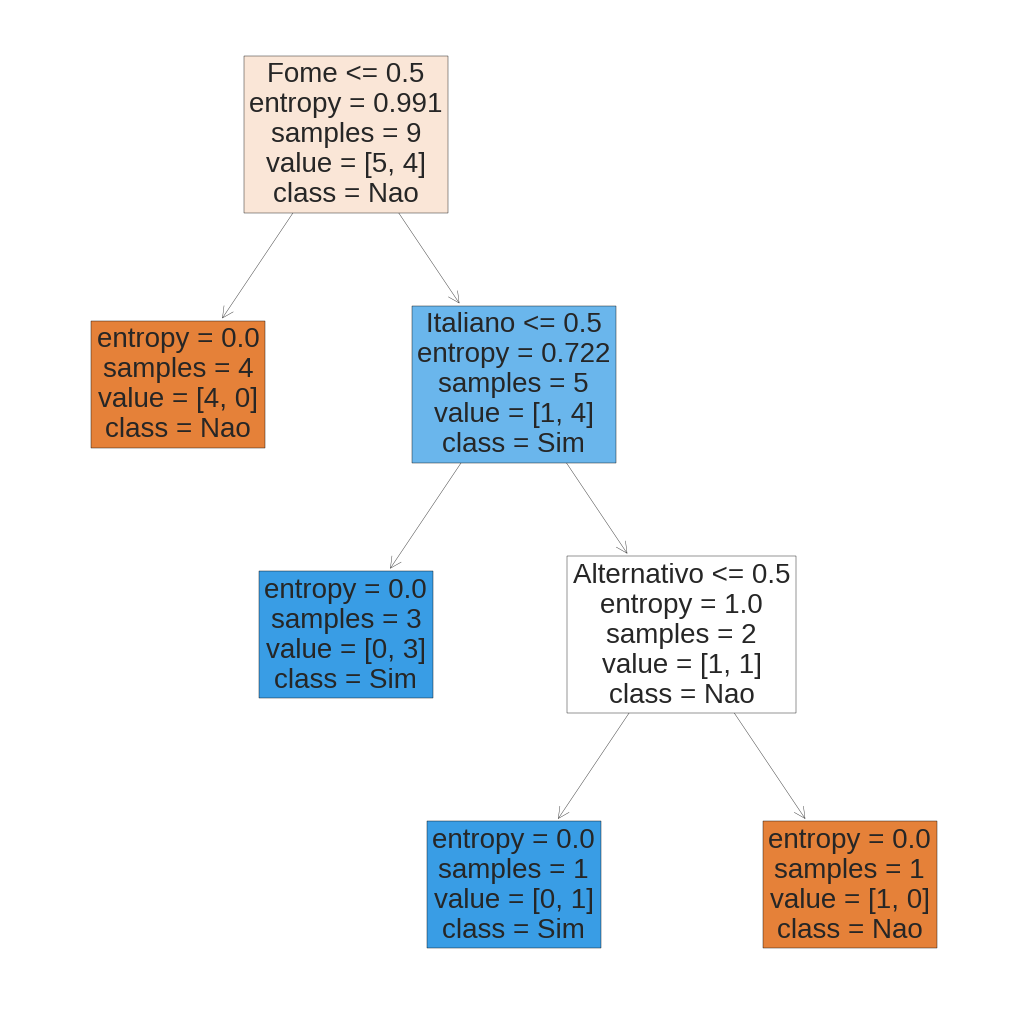

In [43]:
from sklearn import tree
previsores = ['0-10', '10-30', '30-60', '>60', 'Frances', 'Hamburguer', 'Italiano', 'Tailandes', 'R', 'RR', 'RRR', 'Alguns', 'Cheio', 'Nenhum', 'Alternativo', 'Bar', 'SextaSabado', 'Fome','Chuva','Reserva']
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(13,13))
tree.plot_tree(modelo, feature_names=previsores, class_names = modelo.classes_.tolist(), filled=True, fontsize=20);